In [1]:
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
import scanpy as sc

# Adult_Raw

In [3]:
df = pd.read_csv("explore_variance.csv",index_col=0)

In [4]:
df_meta = pd.read_csv("metadata.csv",index_col=0)
df["donor_ID"] = df_meta.donor_ID
df["Ref"] = df_meta.Ref

/home/cyx/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (5,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
var_list = [np.var(df.loc[:,x]) for x in df.columns[0:30]]
var_ratio_list = var_list/sum(var_list)

In [6]:
covariat_list = ["seq_tech","subregion","donor_gender","donor_age","donor_ID","MCT"]

In [7]:
var_explained_list = []
for covariat in covariat_list:
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df[covariat])
        lm.fit(x_dummy,df.loc[:,df.columns[i]])
        var_explained += max(lm.score(x_dummy,df.loc[:,df.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [8]:
df_var = pd.DataFrame(var_explained_list,columns=["All"])
df_var.index = covariat_list

## MCTs

In [11]:
df["cell_type"] = df_meta.cell_type

In [12]:
covariat_list = ["seq_tech","subregion","donor_gender","donor_age","donor_ID","cell_type"]

In [13]:
for ct in np.unique(df.MCT):
    df_ct = df.loc[df.MCT==ct,:]
    var_list_ct = [np.var(df_ct.loc[:,x]) for x in df_ct.columns[0:30]]
    var_ratio_list_ct = var_list_ct/sum(var_list_ct)
    var_explained_list = []
    for covariat in covariat_list:
        var_explained = 0
        for i in range(30):
            lm = LinearRegression()
            x_dummy = pd.get_dummies(df_ct[covariat])
            lm.fit(x_dummy,df_ct.loc[:,df_ct.columns[i]])
            var_explained += max(lm.score(x_dummy,df_ct.loc[:,df_ct.columns[i]]),0)* var_ratio_list_ct[i]
        var_explained_list.append(var_explained)
        
    df_var[ct] = var_explained_list

In [14]:
df_var_bk = df_var

In [15]:
df_var = df_var[['All', 'Cardiomyocyte cell','Endothelial cell', 'Fibroblast', 'Lymphoid cell', 'Myeloid cell',   'Mesothelial cell','Adipocyte', 'Neuron', 'Pericyte', 'Smooth muscle cell']]
df_var = df_var.reindex(index=['seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'subregion',  'MCT'])
df_var.index = ['seq_tech', 'donor', 'gender', 'age', 'subregion',  'cell_type']

In [16]:
df_var = round(df_var.astype(float),4)

## Plot

In [48]:
df_var_4plot = df_var
df_var_4plot.to_csv("PCR_results/Adult_raw.csv")

In [70]:
df_var_4plot = pd.read_csv("PCR_results/Adult_raw.csv",index_col=0)
df_var_4plot = df_var_4plot.drop('donor',axis=0)

In [71]:
df_var_4plot

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Myeloid cell,Mesothelial cell,Adipocyte,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.0250,0.0520,0.0726,0.0105,0.0318,0.0406,0.8010,0.0000,0.0000,0.0241,0.0424
gender,0.0097,0.0477,0.0053,0.0280,0.0222,0.0184,0.1157,0.0193,0.0195,0.0087,0.0277
age,0.0967,0.1628,0.3102,0.2186,0.4028,0.3022,0.8254,0.0739,0.1736,0.1996,0.2190
subregion,0.0428,0.1321,0.0669,0.0963,0.0356,0.0350,0.3871,0.0510,0.0338,0.0400,0.0954
cell_type,0.3462,0.0000,0.0724,0.0283,0.5748,0.2421,0.0000,0.0000,0.0000,0.0000,0.0000


In [73]:
df_mask = np.zeros_like(df_var_4plot)
df_mask[4,1] = True
df_mask[4,6:] = True
df_mask[0,8:10] = True

In [74]:
import seaborn as sns

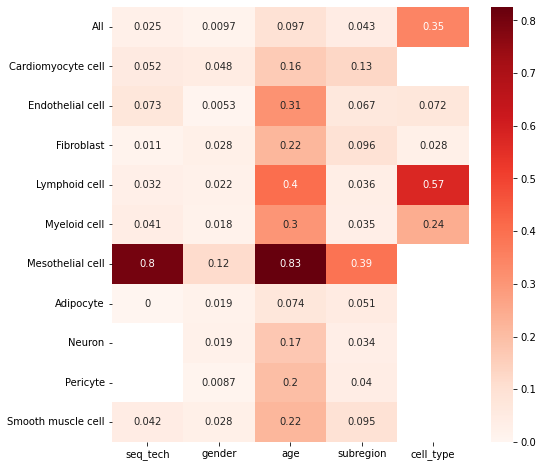

In [75]:
import matplotlib.pyplot as plt
fig,ax =plt.subplots(figsize = (8,8))
fig = sns.heatmap(df_var_4plot.transpose(),annot=True,cmap="Reds",mask=df_mask.transpose())

In [76]:
ax.get_figure().savefig("figures/Adult_raw.pdf",dpi=500)

# Adult_SCVI

In [77]:
adata = sc.read_h5ad("/data3/cyx/ForDatabase0606/Adult.Heart.SCVI.h5ad")

In [51]:
df_meta = df.loc[:,['seq_tech', 'subregion', 'donor_gender', 'donor_age',
       'MCT', 'donor_ID', 'Ref', 'cell_type']]

In [52]:
df = pd.DataFrame(adata.obsm['X_scVI'])
df.index = adata.obs.index
df.loc[:,['seq_tech', 'subregion', 'donor_gender', 'donor_age',
       'MCT', 'donor_ID', 'Ref', 'cell_type']] = df_meta

In [53]:
var_list = [np.var(df.loc[:,x]) for x in df.columns[0:30]]
var_ratio_list = var_list/sum(var_list)

In [54]:
covariat_list = ["seq_tech","subregion","donor_gender","donor_age","donor_ID","MCT"]

In [55]:
var_explained_list = []
for covariat in covariat_list:
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df[covariat])
        lm.fit(x_dummy,df.loc[:,df.columns[i]])
        var_explained += max(lm.score(x_dummy,df.loc[:,df.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [56]:
df_var = pd.DataFrame(var_explained_list,columns=["All"])
df_var.index = covariat_list

## MCTs

In [57]:
df["cell_type"] = df_meta.cell_type

In [58]:
covariat_list = ["seq_tech","subregion","donor_gender","donor_age","donor_ID","cell_type"]

In [59]:
for ct in np.unique(df.MCT):
    df_ct = df.loc[df.MCT==ct,:]
    var_list_ct = [np.var(df_ct.loc[:,x]) for x in df_ct.columns[0:30]]
    var_ratio_list_ct = var_list_ct/sum(var_list_ct)
    var_explained_list = []
    for covariat in covariat_list:
        var_explained = 0
        for i in range(30):
            lm = LinearRegression()
            x_dummy = pd.get_dummies(df_ct[covariat])
            lm.fit(x_dummy,df_ct.loc[:,df_ct.columns[i]])
            var_explained += max(lm.score(x_dummy,df_ct.loc[:,df_ct.columns[i]]),0)* var_ratio_list_ct[i]
        var_explained_list.append(var_explained)
        
    df_var[ct] = var_explained_list

In [60]:
df_var_bk = df_var

In [61]:
df_var = df_var[['All', 'Cardiomyocyte cell','Endothelial cell', 'Fibroblast', 'Lymphoid cell', 'Myeloid cell',   'Mesothelial cell','Adipocyte', 'Neuron', 'Pericyte', 'Smooth muscle cell']]
df_var = df_var.reindex(index=['seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'subregion',  'MCT'])
df_var.index = ['seq_tech', 'donor', 'gender', 'age', 'subregion',  'cell_type']

In [62]:
df_var = round(df_var.astype(float),4)

## Plot

In [78]:
df_var_4plot = df_var
df_var_4plot = df_var_4plot.loc[['seq_tech', 'gender', 'age', 'subregion',  'cell_type'],:]

In [65]:
df_var_4plot.to_csv("PCR_results/Adult_integrated.csv")

In [80]:
df_mask = np.zeros_like(df_var_4plot)
df_mask[4,1] = True
df_mask[4,6:] = True
df_mask[0,8:10] = True

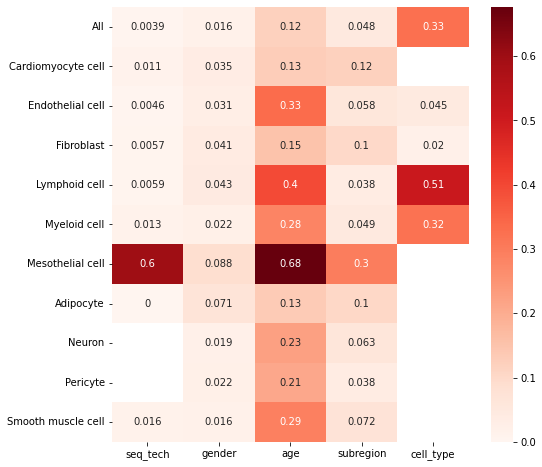

In [81]:
import matplotlib.pyplot as plt
fig,ax =plt.subplots(figsize = (8,8))
fig = sns.heatmap(df_var_4plot.transpose(),annot=True,cmap="Reds",mask=df_mask.transpose())

In [82]:
ax.get_figure().savefig("figures/Adult_integration.pdf",dpi=500)

# Fetal

In [83]:
df = pd.read_csv("explore_variance_fetal.csv",index_col=0)
df.donor_age = [int(x[2:][:-1]) for x in df.donor_age]

/home/cyx/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
## there is NA in gender and subregions, so these two covariat should be calculated manually
covariat_list = ["seq_tech","donor_age","donor_ID","MCT"]

In [85]:
var_list = [np.var(df.loc[:,x]) for x in df.columns[0:30]]
var_ratio_list = var_list/sum(var_list)

In [86]:
var_explained_list = []
for covariat in covariat_list:
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df[covariat])
        lm.fit(x_dummy,df.loc[:,df.columns[i]])
        var_explained += max(lm.score(x_dummy,df.loc[:,df.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [87]:
for cov in ["subregion","donor_gender"]:
    df_corv = df[-pd.isna(df[cov])]
    var_list_corv = [np.var(df_corv.loc[:,x]) for x in df_corv.columns[0:30]]
    var_ratio_list_corv = var_list_corv/sum(var_list_corv)
    
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df_corv[cov])
        lm.fit(x_dummy,df_corv.loc[:,df_corv.columns[i]])
        var_explained += max(lm.score(x_dummy,df_corv.loc[:,df_corv.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [88]:
df_var = pd.DataFrame(var_explained_list,columns=["All"])
df_var.index = ["seq_tech","donor_age","donor_ID","MCT","subregion","donor_gender"]

## MCTs

In [90]:
covariat_list = ["seq_tech","donor_age","donor_ID","cell_type","subregion","donor_gender"]

In [91]:
np.unique(df.MCT)[0:9]

array(['Cardiomyocyte cell', 'Endothelial cell', 'Fibroblast',
       'Lymphoid cell', 'Mesothelial cell', 'Myeloid cell', 'Neuron',
       'Pericyte', 'Smooth muscle cell'], dtype=object)

In [92]:
# delet unknown
for ct in np.unique(df.MCT)[0:9]:
    df_ct = df.loc[df.MCT==ct,:]
    var_explained_list = []
    for cov in covariat_list:
        df_corv = df_ct[-pd.isna(df_ct[cov])]
        var_list_corv = [np.var(df_corv.loc[:,x]) for x in df_corv.columns[0:30]]
        var_ratio_list_corv = var_list_corv/sum(var_list_corv)
        var_explained = 0
        if len(df_corv[cov])<40:
            var_explained_list.append(var_explained)
        else:
            for i in range(30):
                lm = LinearRegression()
                x_dummy = pd.get_dummies(df_corv[cov])
                lm.fit(x_dummy,df_corv.loc[:,df_corv.columns[i]])
                var_explained += max(lm.score(x_dummy,df_corv.loc[:,df_corv.columns[i]]),0)* var_ratio_list[i]
            var_explained_list.append(var_explained)

    df_var[ct] = var_explained_list

/tmp/ipykernel_807731/3124365648.py:8: RuntimeWarning: invalid value encountered in true_divide
  var_ratio_list_corv = var_list_corv/sum(var_list_corv)


In [93]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.399367,0.535994,0.517826,0.533508,0.531904,0.578872,0.543963,0.501825,0.595944,0.527346
donor_age,0.403861,0.455030,0.485250,0.582923,0.539944,0.646132,0.584605,0.520746,0.572544,0.508117
donor_ID,0.489133,0.625499,0.597252,0.666097,0.649103,0.685980,0.666963,0.532817,0.738195,0.616749
MCT,0.181289,0.000000,0.035524,0.092515,0.045055,0.000000,0.130645,0.000000,0.000000,0.000000
subregion,0.196436,0.084250,0.201558,0.374564,0.280949,0.231881,0.258530,0.000000,0.190060,0.280444
donor_gender,0.005181,0.005829,0.006039,0.014446,0.002058,0.002937,0.014397,0.009304,0.092578,0.020117


In [94]:
df_var_bk = df_var

In [95]:
df_var = df_var.reindex(index=['seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'subregion',  'MCT'])
df_var.index = ['seq_tech', 'donor', 'gender', 'age', 'subregion',  'cell_type']

In [96]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.399367,0.535994,0.517826,0.533508,0.531904,0.578872,0.543963,0.501825,0.595944,0.527346
donor,0.489133,0.625499,0.597252,0.666097,0.649103,0.685980,0.666963,0.532817,0.738195,0.616749
gender,0.005181,0.005829,0.006039,0.014446,0.002058,0.002937,0.014397,0.009304,0.092578,0.020117
age,0.403861,0.455030,0.485250,0.582923,0.539944,0.646132,0.584605,0.520746,0.572544,0.508117
subregion,0.196436,0.084250,0.201558,0.374564,0.280949,0.231881,0.258530,0.000000,0.190060,0.280444
cell_type,0.181289,0.000000,0.035524,0.092515,0.045055,0.000000,0.130645,0.000000,0.000000,0.000000


In [97]:
df_var = round(df_var.astype(float),4)

In [98]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.3994,0.5360,0.5178,0.5335,0.5319,0.5789,0.5440,0.5018,0.5959,0.5273
donor,0.4891,0.6255,0.5973,0.6661,0.6491,0.6860,0.6670,0.5328,0.7382,0.6167
gender,0.0052,0.0058,0.0060,0.0144,0.0021,0.0029,0.0144,0.0093,0.0926,0.0201
age,0.4039,0.4550,0.4852,0.5829,0.5399,0.6461,0.5846,0.5207,0.5725,0.5081
subregion,0.1964,0.0842,0.2016,0.3746,0.2809,0.2319,0.2585,0.0000,0.1901,0.2804
cell_type,0.1813,0.0000,0.0355,0.0925,0.0451,0.0000,0.1306,0.0000,0.0000,0.0000


## Plot

In [99]:
df_var_4plot = df_var
df_var_4plot = df_var_4plot.drop('donor',axis=0)

In [100]:
df_var_4plot.to_csv("PCR_results/Fetal_raw.csv")

In [101]:
df_mask = np.zeros_like(df_var_4plot)
df_mask[4,1] = True
df_mask[4,5] = True
df_mask[4,7:10] = True
df_mask[3,7] = True

In [102]:
import seaborn as sns

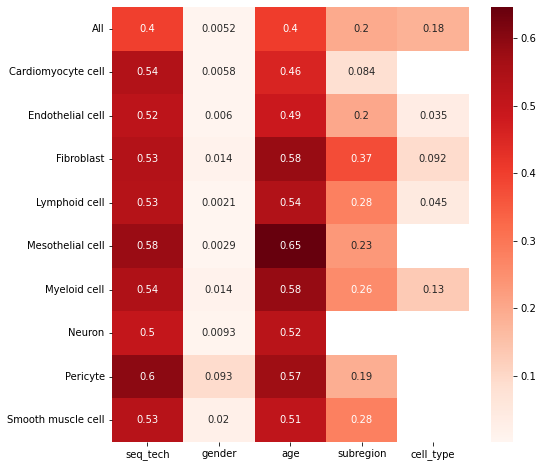

In [105]:
fig,ax =plt.subplots(figsize = (8,8))
fig = sns.heatmap(df_var_4plot.transpose(),annot=True,cmap="Reds",mask=df_mask.transpose())

In [106]:
ax.get_figure().savefig("figures/Fetal_raw.pdf",dpi=500)

# Fetal_SCVI

In [104]:
adata = sc.read_h5ad("/data3/cyx/ForDatabase0606/Fetal.Heart.SCVI.h5ad")

In [107]:
df = pd.DataFrame(adata.obsm['X_scVI'])
df.index = adata.obs.index

In [108]:
df["seq_tech"] = adata.obs.seq_tech
df["subregion"] = adata.obs.subregion
df["donor_gender"] = adata.obs.donor_gender
df["donor_age"] = [int(x[2:][:-1]) for x in adata.obs.donor_age]
df["MCT"] = adata.obs.MCT
df["cell_type"] = adata.obs.cell_type
df["donor_ID"] = adata.obs.donor_ID
df["Ref"] = adata.obs.Ref

In [109]:
pd.unique(df.MCT)

['Unknown', 'Smooth muscle cell', 'Fibroblast', 'Cardiomyocyte cell', 'Endothelial cell', 'Neuron', 'Mesothelial cell', 'Pericyte', 'Myeloid cell', 'Lymphoid cell']
Categories (10, object): ['Cardiomyocyte cell', 'Endothelial cell', 'Fibroblast', 'Lymphoid cell', ..., 'Neuron', 'Pericyte', 'Smooth muscle cell', 'Unknown']

In [110]:
## there is NA in gender and subregions, so these two covariat should be calculated manually
covariat_list = ["seq_tech","donor_age","donor_ID","cell_type"]

In [111]:
var_list = [np.var(df.loc[:,x]) for x in df.columns[0:30]]
var_ratio_list = var_list/sum(var_list)

In [112]:
var_explained_list = []
for covariat in covariat_list:
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df[covariat])
        lm.fit(x_dummy,df.loc[:,df.columns[i]])
        var_explained += max(lm.score(x_dummy,df.loc[:,df.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [113]:
for cov in ["subregion","donor_gender"]:
    df_corv = df[-pd.isna(df[cov])]
    var_list_corv = [np.var(df_corv.loc[:,x]) for x in df_corv.columns[0:30]]
    var_ratio_list_corv = var_list_corv/sum(var_list_corv)
    
    var_explained = 0
    for i in range(30):
        lm = LinearRegression()
        x_dummy = pd.get_dummies(df_corv[cov])
        lm.fit(x_dummy,df_corv.loc[:,df_corv.columns[i]])
        var_explained += max(lm.score(x_dummy,df_corv.loc[:,df_corv.columns[i]]),0)* var_ratio_list[i]
    var_explained_list.append(var_explained)

In [114]:
df_var = pd.DataFrame(var_explained_list,columns=["All"])
df_var.index = ["seq_tech","donor_age","donor_ID","cell_type","subregion","donor_gender"]

In [115]:
df_var

,All
seq_tech,0.012948
donor_age,0.038916
donor_ID,0.050416
cell_type,0.165651
subregion,0.008232
donor_gender,0.011231


## MCTs

In [116]:
covariat_list = ["seq_tech","donor_age","donor_ID","cell_type","subregion","donor_gender"]

In [117]:
np.unique(df.MCT)[0:9]

array(['Cardiomyocyte cell', 'Endothelial cell', 'Fibroblast',
       'Lymphoid cell', 'Mesothelial cell', 'Myeloid cell', 'Neuron',
       'Pericyte', 'Smooth muscle cell'], dtype=object)

In [118]:
# delet unknown
for ct in np.unique(df.MCT)[0:9]:
    df_ct = df.loc[df.MCT==ct,:]
    var_explained_list = []
    for cov in covariat_list:
        df_corv = df_ct[-pd.isna(df_ct[cov])]
        var_list_corv = [np.var(df_corv.loc[:,x]) for x in df_corv.columns[0:30]]
        var_ratio_list_corv = var_list_corv/sum(var_list_corv)
        var_explained = 0
        if len(df_corv[cov])<40:
            var_explained_list.append(var_explained)
        else:
            for i in range(30):
                lm = LinearRegression()
                x_dummy = pd.get_dummies(df_corv[cov])
                lm.fit(x_dummy,df_corv.loc[:,df_corv.columns[i]])
                var_explained += max(lm.score(x_dummy,df_corv.loc[:,df_corv.columns[i]]),0)* var_ratio_list[i]
            var_explained_list.append(var_explained)

    df_var[ct] = var_explained_list

In [119]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.012948,1.438250e-02,0.022031,0.047312,0.026496,6.782915e-02,0.079520,6.278591e-02,2.042943e-01,7.566623e-02
donor_age,0.038916,4.197997e-02,0.049594,0.097316,0.055074,1.193280e-01,0.133606,8.828299e-02,3.207214e-01,1.173239e-01
donor_ID,0.050416,5.703701e-02,0.060116,0.108984,0.084501,1.353584e-01,0.159042,1.022559e-01,4.200596e-01,1.271132e-01
cell_type,0.165651,2.811470e-09,0.051662,0.023409,0.100253,4.664927e-09,0.029303,5.549299e-09,2.022121e-09,3.093695e-09
subregion,0.008232,8.423267e-03,0.008375,0.025021,0.034353,6.059943e-02,0.066422,2.835911e-03,1.961578e-01,8.923574e-03
donor_gender,0.011231,1.476565e-02,0.018969,0.026749,0.015572,6.006733e-02,0.022063,1.683666e-02,9.525679e-02,5.519775e-02


In [120]:
df_var_bk = df_var

In [121]:
df_var = df_var.reindex(index=['seq_tech', 'donor_ID', 'donor_gender', 'donor_age', 'subregion',  'cell_type'])
df_var.index = ['seq_tech', 'donor', 'gender', 'age', 'subregion',  'cell_type']

In [122]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.012948,1.438250e-02,0.022031,0.047312,0.026496,6.782915e-02,0.079520,6.278591e-02,2.042943e-01,7.566623e-02
donor,0.050416,5.703701e-02,0.060116,0.108984,0.084501,1.353584e-01,0.159042,1.022559e-01,4.200596e-01,1.271132e-01
gender,0.011231,1.476565e-02,0.018969,0.026749,0.015572,6.006733e-02,0.022063,1.683666e-02,9.525679e-02,5.519775e-02
age,0.038916,4.197997e-02,0.049594,0.097316,0.055074,1.193280e-01,0.133606,8.828299e-02,3.207214e-01,1.173239e-01
subregion,0.008232,8.423267e-03,0.008375,0.025021,0.034353,6.059943e-02,0.066422,2.835911e-03,1.961578e-01,8.923574e-03
cell_type,0.165651,2.811470e-09,0.051662,0.023409,0.100253,4.664927e-09,0.029303,5.549299e-09,2.022121e-09,3.093695e-09


In [123]:
df_var = round(df_var.astype(float),4)

In [124]:
df_var

,All,Cardiomyocyte cell,Endothelial cell,Fibroblast,Lymphoid cell,Mesothelial cell,Myeloid cell,Neuron,Pericyte,Smooth muscle cell
seq_tech,0.0129,0.0144,0.0220,0.0473,0.0265,0.0678,0.0795,0.0628,0.2043,0.0757
donor,0.0504,0.0570,0.0601,0.1090,0.0845,0.1354,0.1590,0.1023,0.4201,0.1271
gender,0.0112,0.0148,0.0190,0.0267,0.0156,0.0601,0.0221,0.0168,0.0953,0.0552
age,0.0389,0.0420,0.0496,0.0973,0.0551,0.1193,0.1336,0.0883,0.3207,0.1173
subregion,0.0082,0.0084,0.0084,0.0250,0.0344,0.0606,0.0664,0.0028,0.1962,0.0089
cell_type,0.1657,0.0000,0.0517,0.0234,0.1003,0.0000,0.0293,0.0000,0.0000,0.0000


## Plot

In [125]:
df_var_4plot = df_var.loc[['seq_tech', 'gender', 'age', 'subregion',  'cell_type'],:]

In [126]:
df_var_4plot.to_csv("PCR_results/Fetal_integration.csv")

In [127]:
df_mask = np.zeros_like(df_var_4plot)
df_mask[4,1] = True
df_mask[4,5] = True
df_mask[4,7:10] = True
df_mask[3,7] = True
df_mask[3,7] = True

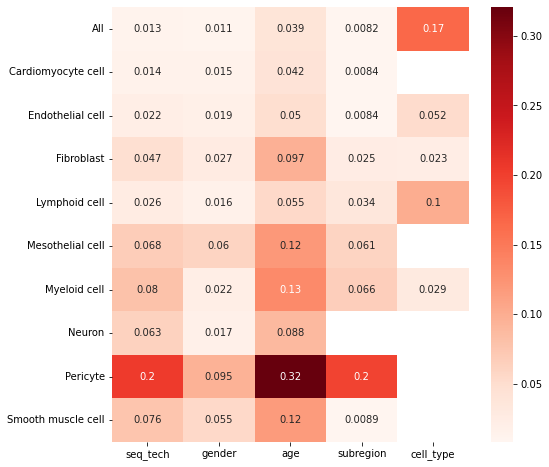

In [128]:
fig,ax =plt.subplots(figsize = (8,8))
fig = sns.heatmap(df_var_4plot.transpose(),annot=True,cmap="Reds",mask=df_mask.transpose())

In [129]:
ax.get_figure().savefig("figures/Fetal_integration.pdf",dpi=500)